/tmp/ipykernel_75084/693322738.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
/tmp/ipykernel_75084/693322738.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop)
/tmp/ipykernel_75084/693322738.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
/tmp/ipykernel_75084/693322738.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
/tmp/ipykernel_75084/693322738.py:71: UserWarning: set_tickl

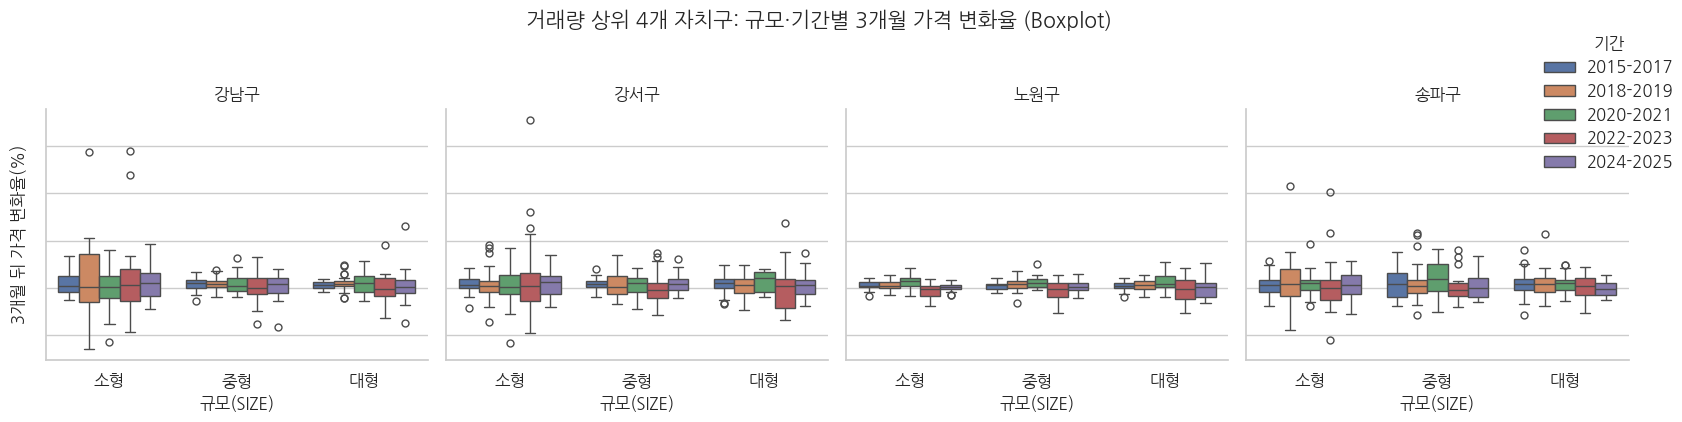

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

read = pd.read_csv('/home/hyuksu/projects/ml/project/데이터/FIN_DATA_v2.csv', encoding='utf-8')

top_states = (
    read.groupby("STATES")["COUNTS"]
        .sum()
        .sort_values(ascending=False)
        .head(4)
        .index
        .tolist()
)
df = read[read["STATES"].isin(top_states)].copy()

def year_group(y: int) -> str:
    if 2015 <= y <= 2017:
        return "2015-2017"
    elif 2018 <= y <= 2019:
        return "2018-2019"
    elif 2020 <= y <= 2021:
        return "2020-2021"
    elif 2022 <= y <= 2023:
        return "2022-2023"
    else:
        return "2024-2025"

# ✅ YEAR_GROUP 컬럼 실제 생성 (이게 핵심)
df["YEAR"] = (df["DATE_YM"].astype(int) // 100)
df["YEAR_GROUP"] = df["YEAR"].apply(year_group)

# (선택) SIZE 순서 고정
df["SIZE"] = pd.Categorical(df["SIZE"], categories=["소형", "중형", "대형"], ordered=True)

# ---------- 폰트 ----------
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=FONT_PATH)
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False
sns.set_theme(style="whitegrid", font="NanumGothic")

# ---------- boxplot ----------
g = sns.catplot(
    data=df,
    x="SIZE",
    y="VARIABLED",
    hue="YEAR_GROUP",
    col="STATES",
    kind="box",
    height=4,
    aspect=0.95,
    showfliers=True
)

g.set_axis_labels("규모(SIZE)", "3개월 뒤 가격 변화율(%)")
g.set_titles("{col_name}")

g.fig.suptitle(
    "거래량 상위 4개 자치구: 규모·기간별 3개월 가격 변화율 (Boxplot)",
    fontproperties=font_prop,
    fontsize=15,
    y=1.05
)

# ---------- 폰트 강제 적용 ----------
for ax in g.axes.flatten():
    ax.set_title(ax.get_title(), fontproperties=font_prop)
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop)

# ✅ legend 위치: 오른쪽 위(바깥)
if g._legend is not None:
    g._legend.set_title("기간")
    g._legend.get_title().set_fontproperties(font_prop)
    for t in g._legend.texts:
        t.set_fontproperties(font_prop)

    g._legend.set_bbox_to_anchor((1.02, 1.0))
    g._legend.set_loc("upper right")

plt.tight_layout()
plt.show()
